In [1]:
import pandas as pd

# Load the data
df = pd.read_excel('recruitment_data_new.xlsx')


print(df.dtypes)  # Check the data types of columns

print(df.head())  # Check the first few rows




candidate_id                   object
recruitment_channel            object
application_date       datetime64[ns]
cost_per_hire                 float64
hire_date              datetime64[ns]
job_level                      object
department                     object
job_title                      object
salary                        float64
education_level                object
years_of_experience             int64
skills                         object
performance_score               int64
bonus                         float64
work_location                  object
age                             int64
retention_period                int64
time_to_hire_days               int64
dtype: object
                           candidate_id recruitment_channel  \
0  87a4fa65-af2f-427d-bcc1-d2a3802c08d5            LinkedIn   
1  ea26aaff-9bf3-4ef6-8ae1-1ef759454d0d            LinkedIn   
2  1515acfc-8729-4e38-8658-4362efef4448          Job Boards   
3  6b1b0291-7b04-4d39-ac8c-c380c3c5ddc4        Soc

In [2]:
# Get value counts for the 'recruitment channel' column
value_counts = df['recruitment_channel'].value_counts()
print(value_counts)


recruitment_channel
Job Boards         1905
LinkedIn            766
Referrals           590
Agency              538
Social Media        351
Company Website     350
Name: count, dtype: int64


In [3]:
df.dtypes

candidate_id                   object
recruitment_channel            object
application_date       datetime64[ns]
cost_per_hire                 float64
hire_date              datetime64[ns]
job_level                      object
department                     object
job_title                      object
salary                        float64
education_level                object
years_of_experience             int64
skills                         object
performance_score               int64
bonus                         float64
work_location                  object
age                             int64
retention_period                int64
time_to_hire_days               int64
dtype: object

In [4]:
# Get value counts for the 'job_title' column
value_counts = df['job_title'].value_counts()
print(value_counts)


job_title
Junior Developer                543
IT Support                      538
Sales Assistant                 331
Junior Sales Representative     318
System Administrator            283
Marketing Intern                260
Social Media Coordinator        257
Software Developer              252
Business Development Officer    169
Sales Executive                 168
Financial Analyst Trainee       150
Accounts Assistant              147
Content Strategist              131
Marketing Specialist            130
Lead Developer                   95
Financial Analyst                92
IT Manager                       83
Recruitment Coordinator          72
Payroll Specialist               72
HR Assistant                     71
Regional Sales Manager           59
Sales Manager                    56
Marketing Manager                49
HR Specialist                    41
Digital Marketing Lead           39
Senior Accountant                26
Finance Manager                  25
Training Coordinat

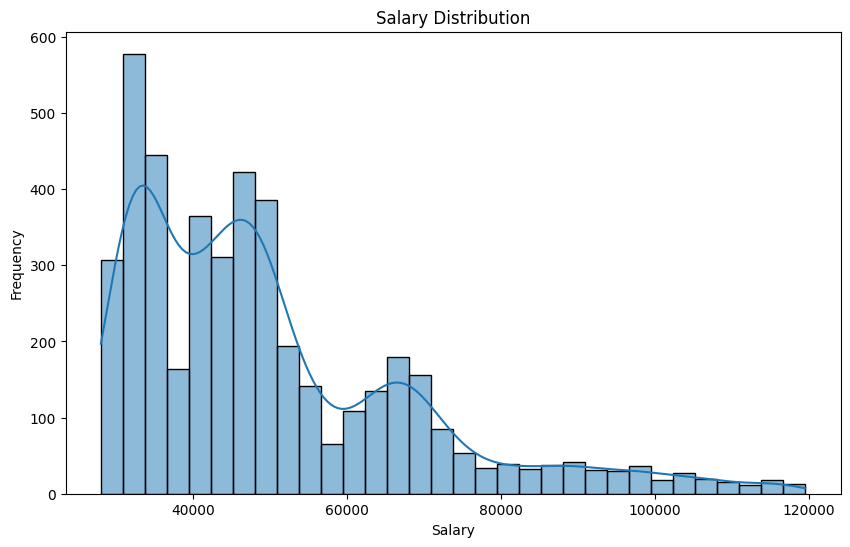

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Univariate Analysis - Distribution of 'salary'
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


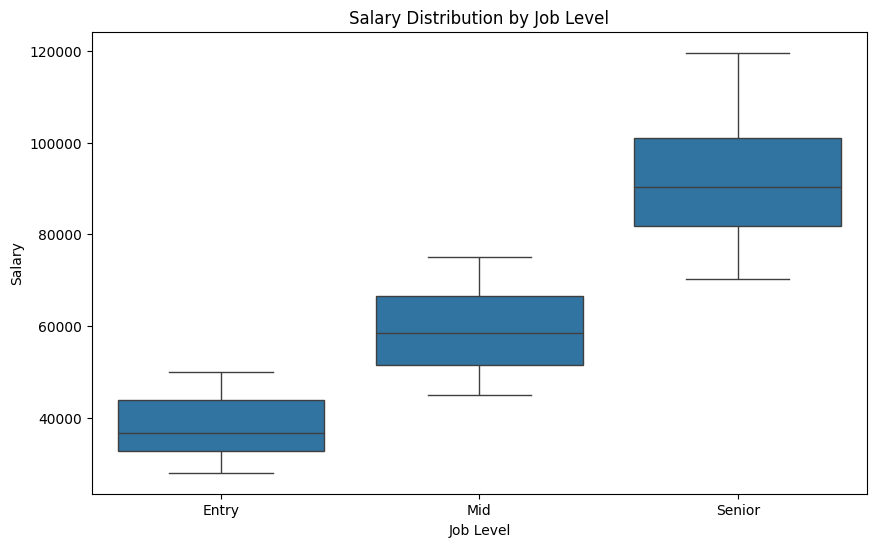

In [6]:
# 2. Boxplot - Salary vs Job Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_level', y='salary', data=df)
plt.title('Salary Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14092\86884483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hire_year'] = df_filtered['hire_date'].dt.year


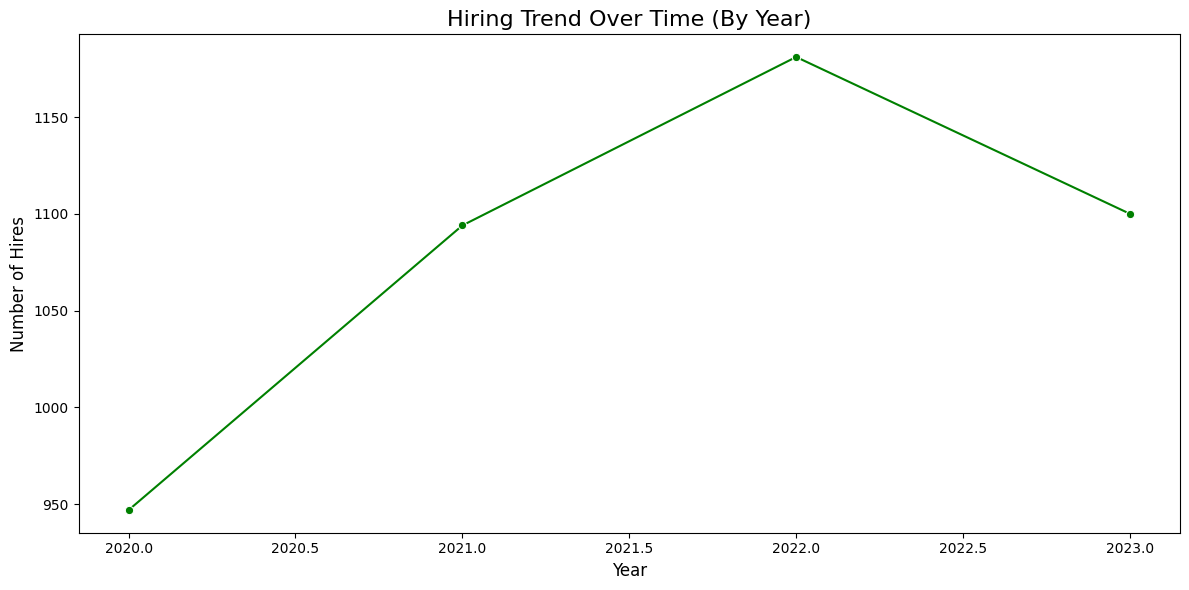

In [7]:
# Convert 'hire_date' to datetime if it's not already in that format
df['hire_date'] = pd.to_datetime(df['hire_date'])

# Filter the data to include only hires before 2024
df_filtered = df[df['hire_date'].dt.year < 2024]

# Extracting the year from the filtered 'hire_date' column
df_filtered['hire_year'] = df_filtered['hire_date'].dt.year

# Grouping by year and counting the number of hires
hire_trend_by_year = df_filtered.groupby('hire_year').size().reset_index(name='num_hires')

# Setting up the plot size
plt.figure(figsize=(12, 6))

# Plotting the line chart
sns.lineplot(x='hire_year', y='num_hires', data=hire_trend_by_year, marker='o', color='g')

# Adding title and labels
plt.title('Hiring Trend Over Time (By Year)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Hires', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
# Add ROI column
df['ROI'] = ((df['performance_score']) * 1000 / (df['cost_per_hire'] + (df['salary'] + df['bonus']) * df['retention_period']))

# View the updated DataFrame
print(df[['candidate_id', 'ROI']].head())

# Save updated DataFrame to Excel if needed
df.to_excel('updated_data_with_ROI.xlsx', index=False)

                           candidate_id       ROI
0  87a4fa65-af2f-427d-bcc1-d2a3802c08d5  0.159548
1  ea26aaff-9bf3-4ef6-8ae1-1ef759454d0d  0.192657
2  1515acfc-8729-4e38-8658-4362efef4448  0.087915
3  6b1b0291-7b04-4d39-ac8c-c380c3c5ddc4  0.190073
4  49512cf6-fd4c-439f-811c-757f8add19f2  0.116379


In [9]:
import pandas as pd

# Define ROI thresholds
def evaluate_roi(roi):
    if roi > 0.2:
        return "Good ROI"
    elif roi >= 0.1:
        return "Average ROI"
    else:
        return "Bad ROI"

# Apply the function to the ROI column
df['ROI_evaluation'] = df['ROI'].apply(evaluate_roi)

# View the result
print(df[['candidate_id', 'ROI', 'ROI_evaluation']].head())
print(df[['candidate_id', 'ROI', 'ROI_evaluation']].tail())

# Save updated DataFrame to Excel if needed
df.to_excel('updated_data_with_ROI-Evaluation.xlsx', index=False)

                           candidate_id       ROI ROI_evaluation
0  87a4fa65-af2f-427d-bcc1-d2a3802c08d5  0.159548    Average ROI
1  ea26aaff-9bf3-4ef6-8ae1-1ef759454d0d  0.192657    Average ROI
2  1515acfc-8729-4e38-8658-4362efef4448  0.087915        Bad ROI
3  6b1b0291-7b04-4d39-ac8c-c380c3c5ddc4  0.190073    Average ROI
4  49512cf6-fd4c-439f-811c-757f8add19f2  0.116379    Average ROI
                              candidate_id       ROI ROI_evaluation
4495  7b656cea-4c12-4db5-94b0-8f28fab371eb  0.156740    Average ROI
4496  4abc8b2b-9dd0-4d32-bee7-84c066086f7e  0.208933       Good ROI
4497  c4b9878b-1b7b-46a0-8635-00764d3b9fb4  0.027612        Bad ROI
4498  9c6589be-7abe-4099-83f9-78f3401d8bd8  0.185794    Average ROI
4499  318e4eda-38bc-47ad-9293-886802a85264  0.035089        Bad ROI


C:\Users\user\AppData\Local\Temp\ipykernel_14092\1530723996.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'num_hires'))


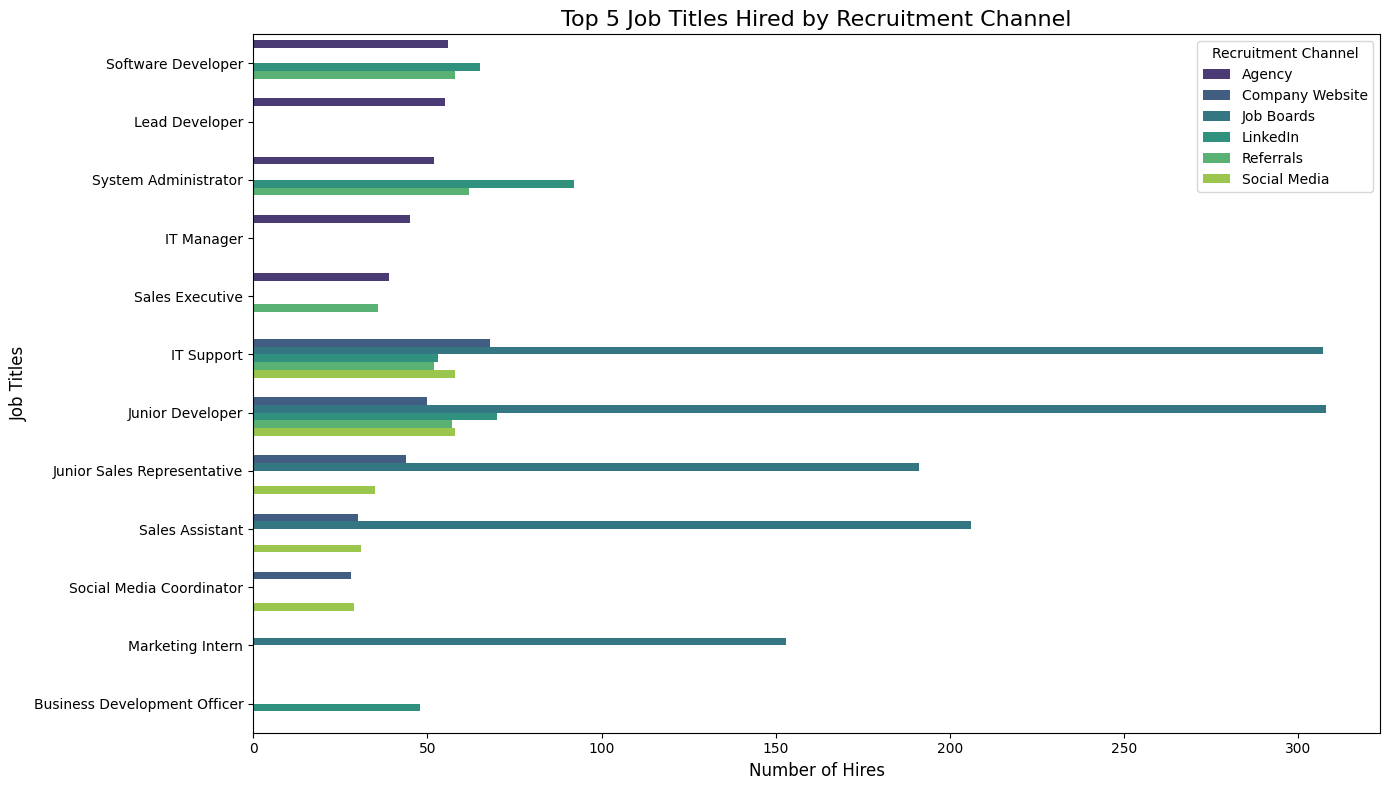

In [10]:
# Grouping by recruitment channel and job title, then counting the number of hires
job_title_counts = (
    df.groupby(['recruitment_channel', 'job_title'])
    .size()
    .reset_index(name='num_hires')
)

# Sorting within each recruitment channel to get the top 5 job titles
top_5_job_titles = (
    job_title_counts.groupby('recruitment_channel', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'num_hires'))
)

# Setting up the plot size
plt.figure(figsize=(14, 8))

# Creating a bar plot
sns.barplot(
    data=top_5_job_titles,
    x='num_hires',
    y='job_title',
    hue='recruitment_channel',
    palette='viridis'
)

# Adding title and labels
plt.title('Top 5 Job Titles Hired by Recruitment Channel', fontsize=16)
plt.xlabel('Number of Hires', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)

# Adjust legend and layout
plt.legend(title='Recruitment Channel', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14092\422439955.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'num_hires'))
C:\Users\user\AppData\Local\Temp\ipykernel_14092\422439955.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_14092\422439955.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppDat

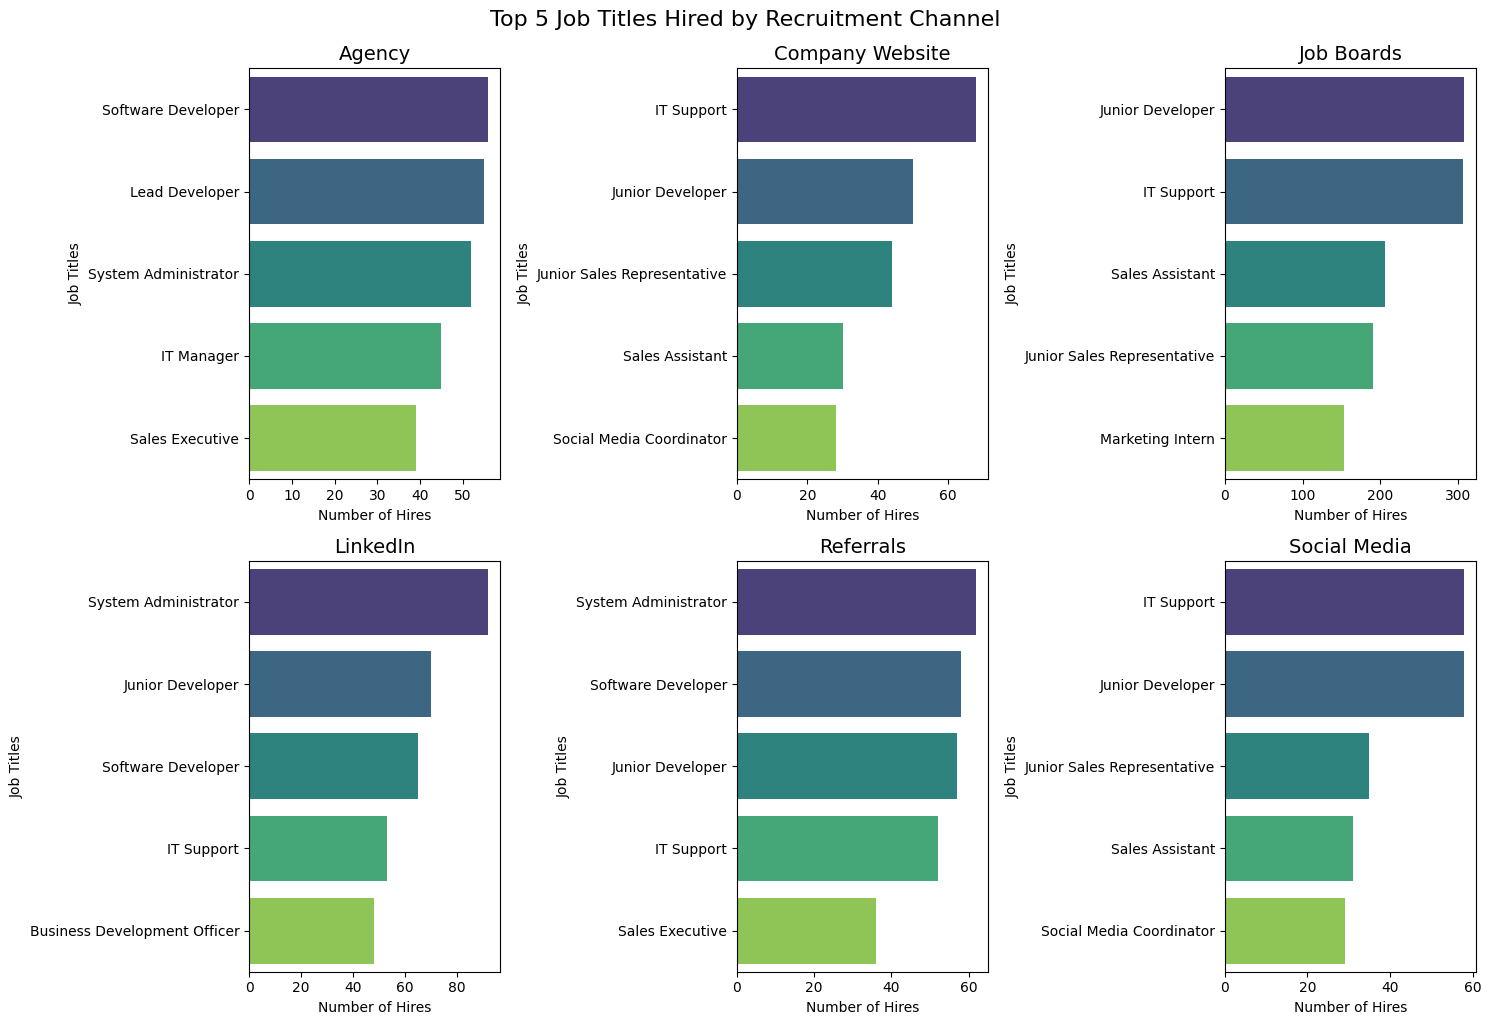

In [11]:
import math

# Grouping by recruitment channel and job title, then counting the number of hires
job_title_counts = (
    df.groupby(['recruitment_channel', 'job_title'])
    .size()
    .reset_index(name='num_hires')
)

# Sorting within each recruitment channel to get the top 5 job titles
top_5_job_titles = (
    job_title_counts.groupby('recruitment_channel', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'num_hires'))
)

# Getting the unique recruitment channels
channels = top_5_job_titles['recruitment_channel'].unique()

# Determine the grid size
num_channels = len(channels)
cols = 3  # Number of columns
rows = math.ceil(num_channels / cols)  # Number of rows

# Setting up the figure for multiple subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flattening for easy iteration

# Plotting each recruitment channel in its respective subplot
for i, channel in enumerate(channels):
    channel_data = top_5_job_titles[top_5_job_titles['recruitment_channel'] == channel]
    
    # Plotting on the current axis
    sns.barplot(
        data=channel_data,
        x='num_hires',
        y='job_title',
        palette='viridis',
        ax=axes[i]
    )
    
    # Adding title and labels
    axes[i].set_title(f'{channel}', fontsize=14)
    axes[i].set_xlabel('Number of Hires', fontsize=10)
    axes[i].set_ylabel('Job Titles', fontsize=10)

# Removing empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout
plt.tight_layout()
plt.suptitle('Top 5 Job Titles Hired by Recruitment Channel', fontsize=16, y=1.02)
plt.show()


In [12]:
retention_by_channel = df.groupby('recruitment_channel')['retention_period'].mean().reset_index()
retention_by_channel = retention_by_channel.sort_values(by='retention_period', ascending=False)


C:\Users\user\AppData\Local\Temp\ipykernel_14092\1332134713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recruitment_channel', y='retention_period', data=retention_by_channel, palette='crest')


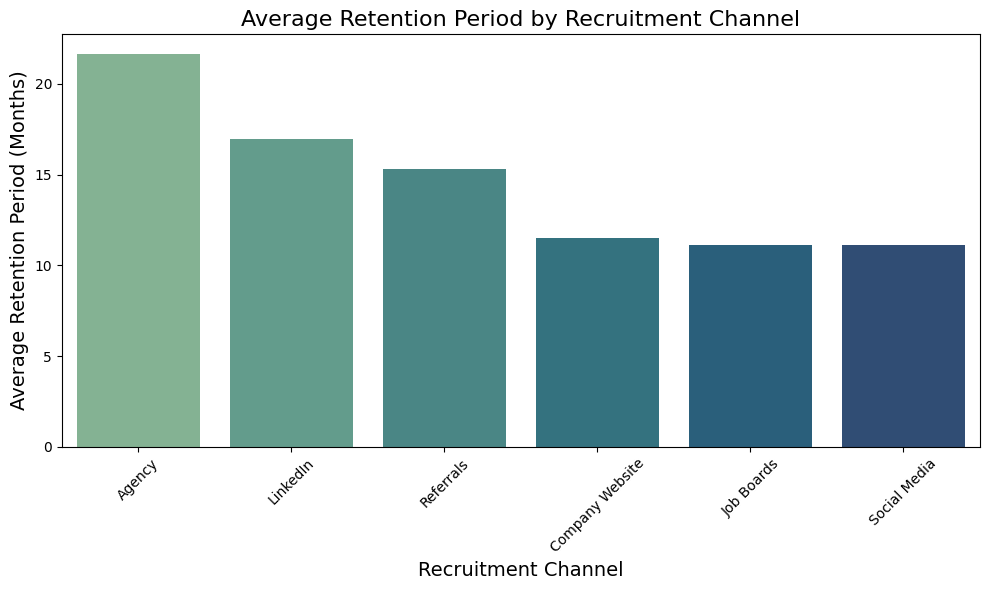

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='recruitment_channel', y='retention_period', data=retention_by_channel, palette='crest')
plt.title('Average Retention Period by Recruitment Channel', fontsize=16)
plt.xlabel('Recruitment Channel', fontsize=14)
plt.ylabel('Average Retention Period (Months)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


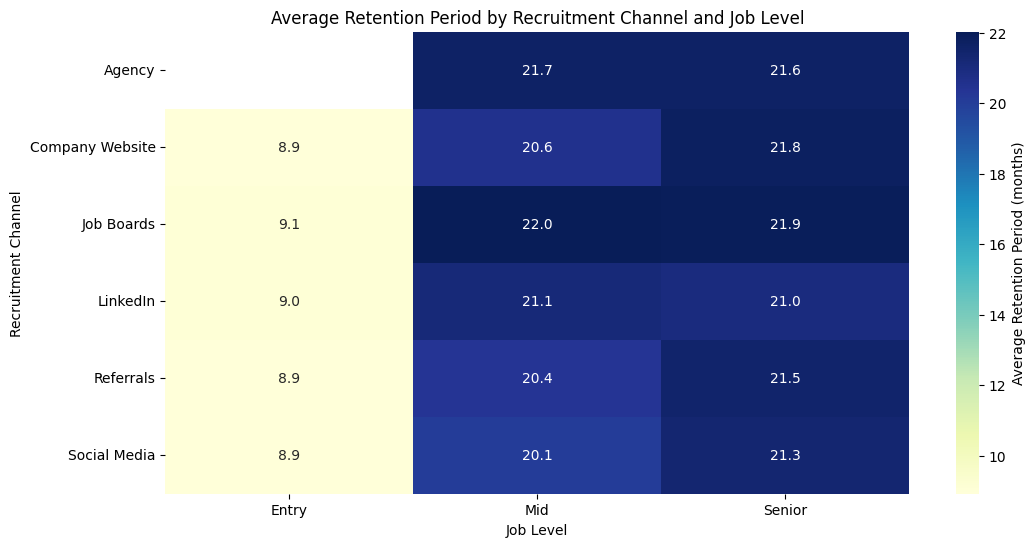

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by recruitment channel and job level, then calculate the average retention period
avg_retention_by_channel_level = df.groupby(['recruitment_channel', 'job_level'])['retention_period'].mean().unstack()

# Plot using a heatmap for better visualization
plt.figure(figsize=(12, 6))
sns.heatmap(avg_retention_by_channel_level, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Average Retention Period (months)'})
plt.title('Average Retention Period by Recruitment Channel and Job Level')
plt.xlabel('Job Level')
plt.ylabel('Recruitment Channel')
plt.show()


In [15]:
from scipy.stats import f_oneway

channels = df['recruitment_channel'].unique()
retention_data = [df[df['recruitment_channel'] == channel]['retention_period'] for channel in channels]
f_stat, p_value = f_oneway(*retention_data)

print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")


F-statistic: 207.60, P-value: 0.0000


indicates a large difference between the retention periods for the different recruitment channels

In [16]:
average_cost_by_channel = df.groupby('recruitment_channel')['cost_per_hire'].mean().reset_index()
average_cost_by_channel = average_cost_by_channel.sort_values(by='cost_per_hire', ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_14092\2463638839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recruitment_channel', y='cost_per_hire', data=average_cost_by_channel, palette='crest')


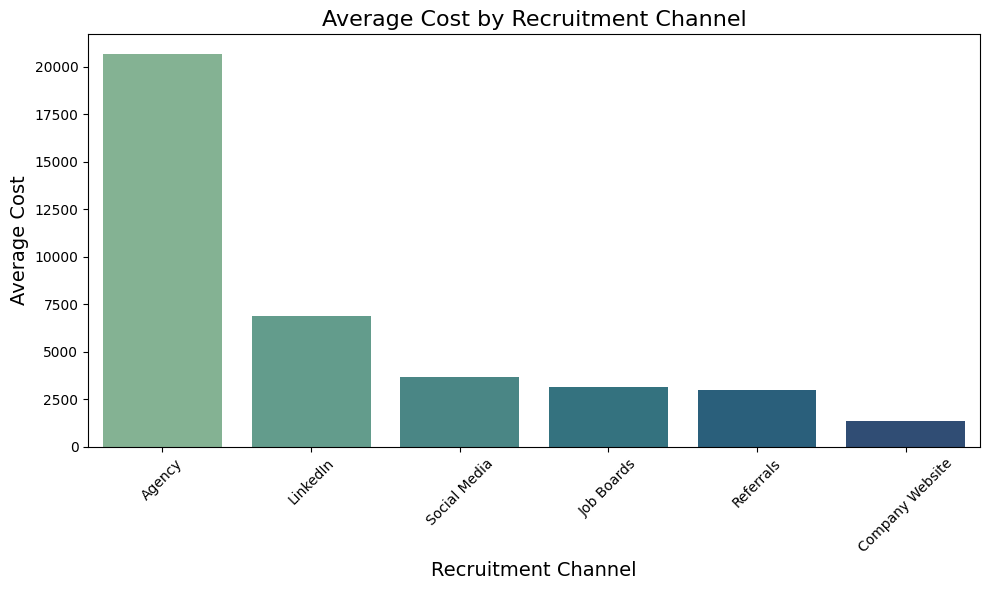

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='recruitment_channel', y='cost_per_hire', data=average_cost_by_channel, palette='crest')
plt.title('Average Cost by Recruitment Channel', fontsize=16)
plt.xlabel('Recruitment Channel', fontsize=14)
plt.ylabel('Average Cost', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
hires_by_channel_level = df.groupby(['recruitment_channel', 'job_level']).size().reset_index(name='count')


In [19]:
pivot_hires = hires_by_channel_level.pivot(index='recruitment_channel', columns='job_level', values='count').fillna(0)


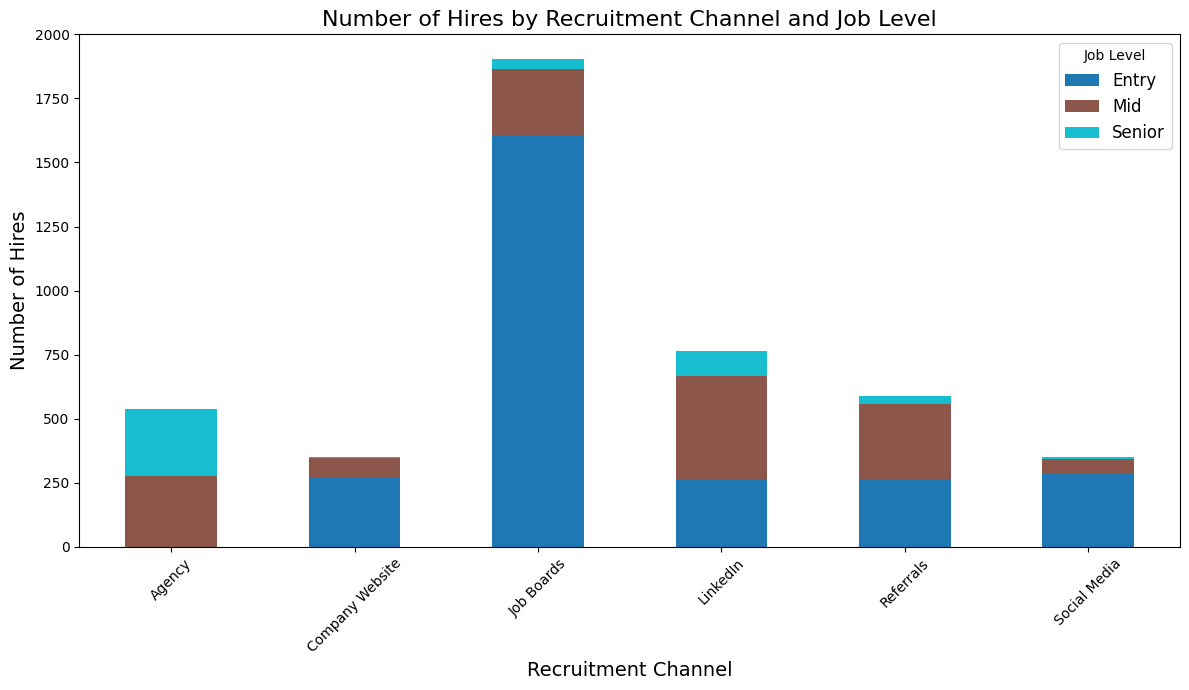

In [20]:
import matplotlib.pyplot as plt

pivot_hires.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab10')

plt.title('Number of Hires by Recruitment Channel and Job Level', fontsize=16)
plt.xlabel('Recruitment Channel', fontsize=14)
plt.ylabel('Number of Hires', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Job Level', fontsize=12)
plt.tight_layout()
plt.show()


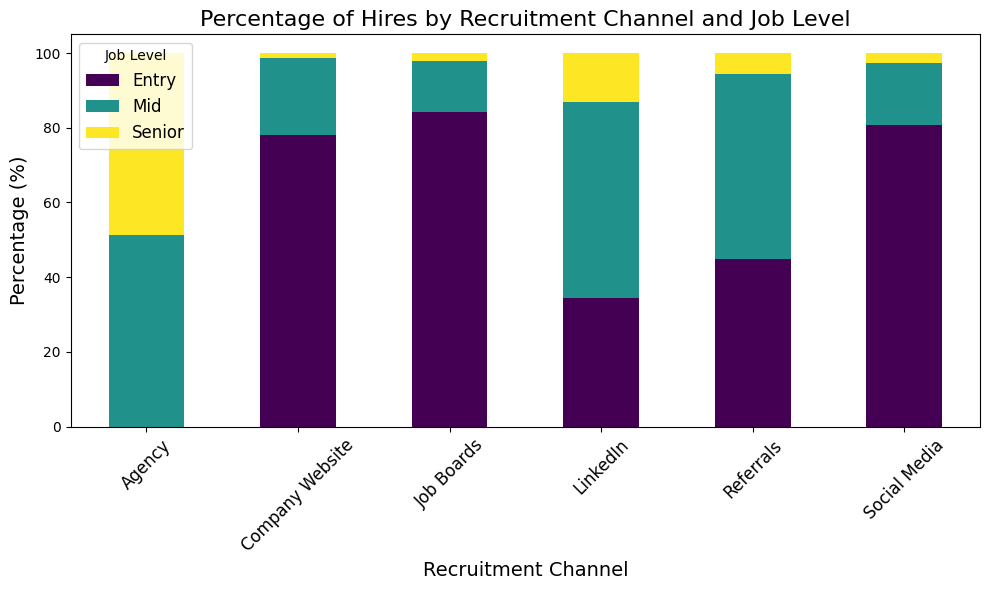

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by recruitment_channel and job_level
hire_counts = df.groupby(['recruitment_channel', 'job_level']).size().reset_index(name='count')

# Calculate percentages
total_hires_per_channel = hire_counts.groupby('recruitment_channel')['count'].transform('sum')
hire_counts['percentage'] = (hire_counts['count'] / total_hires_per_channel) * 100

# Pivot the data for stacked bar chart
pivot_data = hire_counts.pivot(index='recruitment_channel', columns='job_level', values='percentage')

# Plot a stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')

# Chart styling
plt.title('Percentage of Hires by Recruitment Channel and Job Level', fontsize=16)
plt.xlabel('Recruitment Channel', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Job Level', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


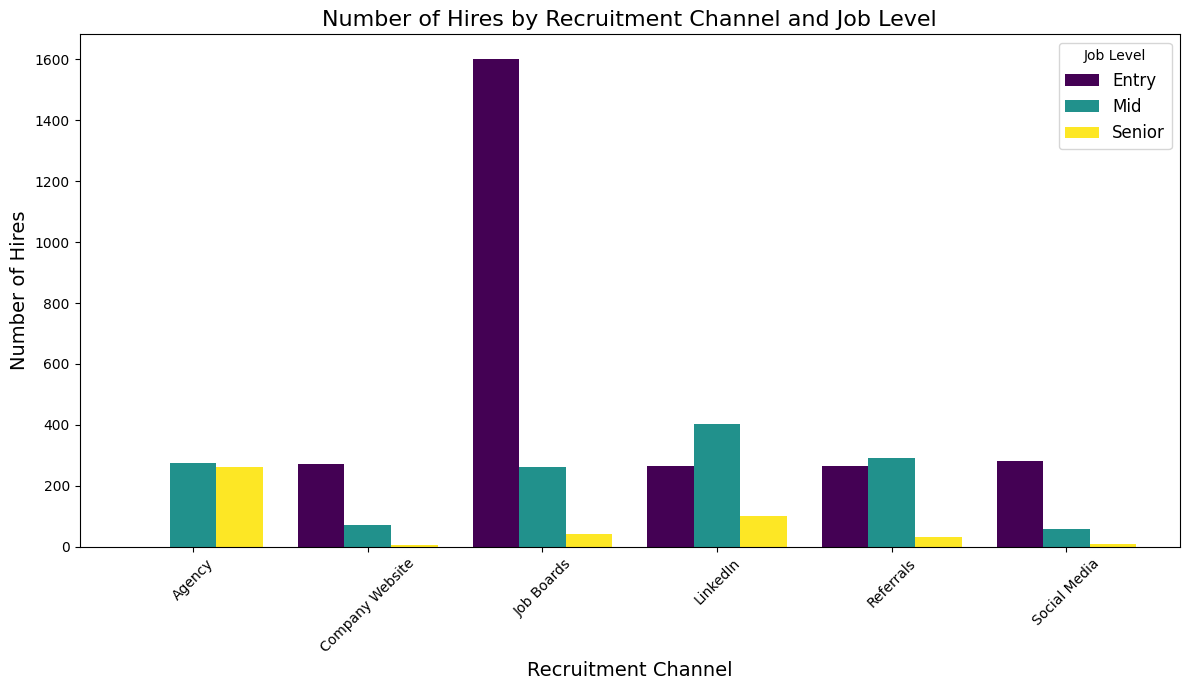

In [22]:
pivot_hires.plot(kind='bar', figsize=(12, 7), colormap='viridis', width=0.8)

plt.title('Number of Hires by Recruitment Channel and Job Level', fontsize=16)
plt.xlabel('Recruitment Channel', fontsize=14)
plt.ylabel('Number of Hires', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Job Level', fontsize=12)
plt.tight_layout()
plt.show()


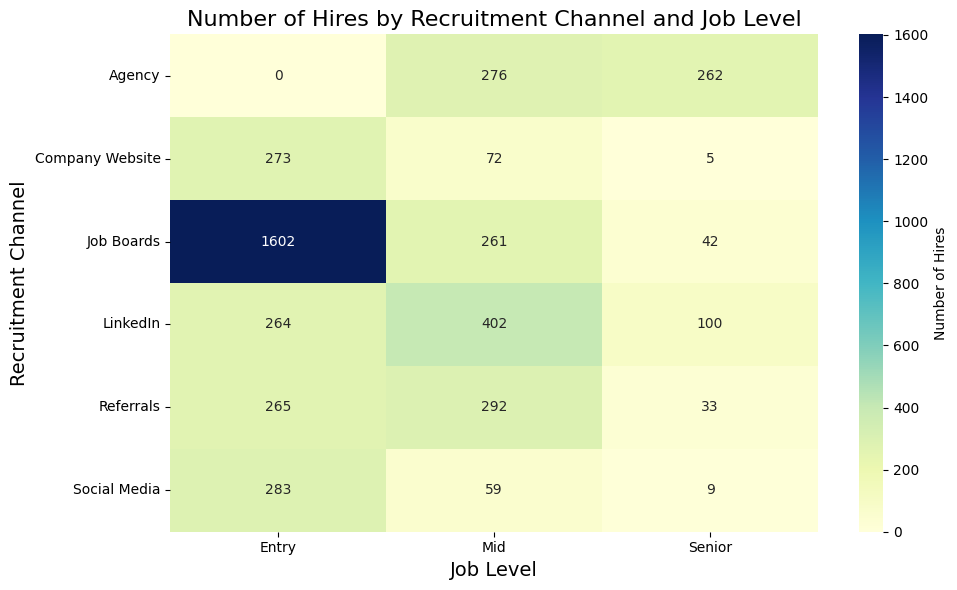

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_hires, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Number of Hires'})

plt.title('Number of Hires by Recruitment Channel and Job Level', fontsize=16)
plt.xlabel('Job Level', fontsize=14)
plt.ylabel('Recruitment Channel', fontsize=14)
plt.tight_layout()
plt.show()


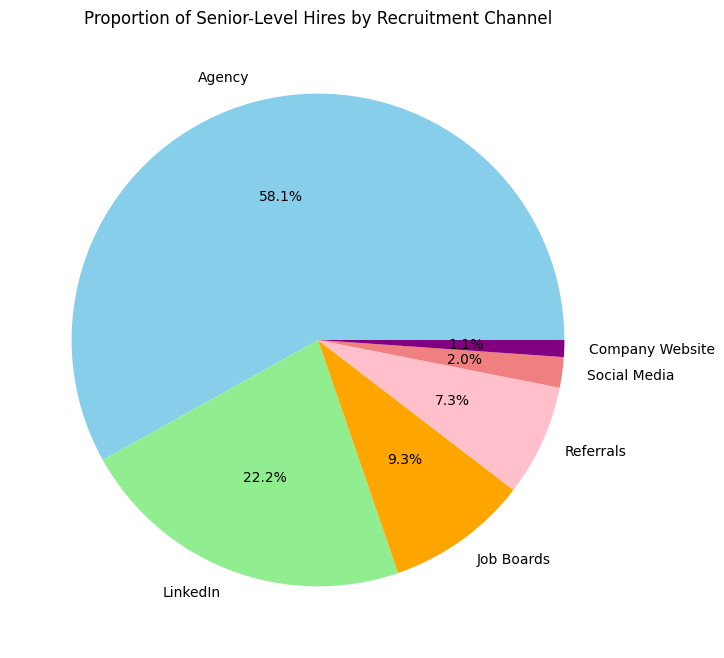

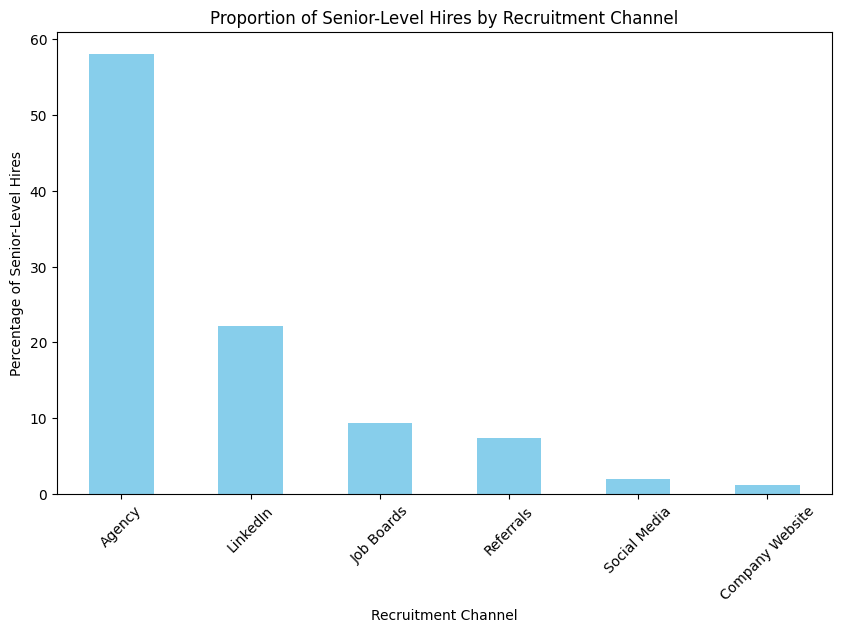

In [24]:
import matplotlib.pyplot as plt

# Filter data for senior-level employees
senior_level_data = df[df["job_level"] == "Senior"]

# Calculate the count of senior-level hires per recruitment channel
senior_channel_count = senior_level_data["recruitment_channel"].value_counts()

# Calculate percentages
senior_channel_percentage = senior_channel_count / senior_channel_count.sum() * 100

# Visualization: Pie Chart
plt.figure(figsize=(8, 8))
senior_channel_percentage.plot(
    kind="pie",
    autopct="%.1f%%",
    colors=["skyblue", "lightgreen", "orange", "pink", "lightcoral", "purple"],
    title="Proportion of Senior-Level Hires by Recruitment Channel"
)
plt.ylabel("")  # Remove the default y-axis label
plt.show()

# Visualization: Bar Chart
plt.figure(figsize=(10, 6))
senior_channel_percentage.plot(
    kind="bar",
    color="skyblue",
    title="Proportion of Senior-Level Hires by Recruitment Channel"
)
plt.xlabel("Recruitment Channel")
plt.ylabel("Percentage of Senior-Level Hires")
plt.xticks(rotation=45)
plt.show()


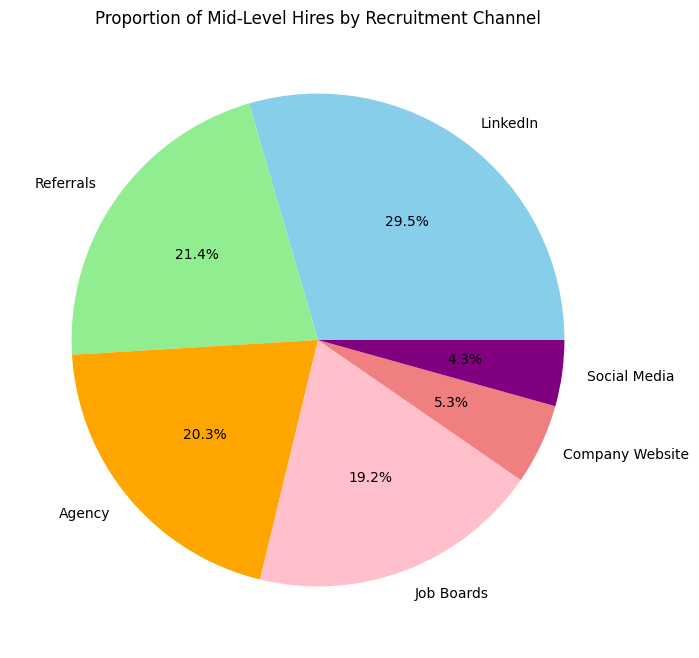

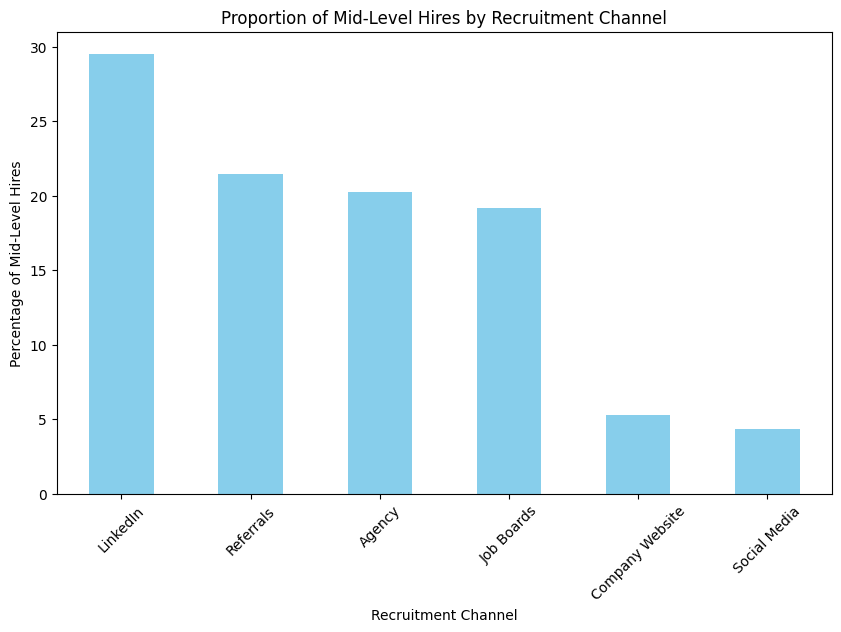

In [25]:
import matplotlib.pyplot as plt

# Filter data for mid-level employees
mid_level_data = df[df["job_level"] == "Mid"]

# Calculate the count of mid-level hires per recruitment channel
mid_channel_count = mid_level_data["recruitment_channel"].value_counts()

# Calculate percentages
mid_channel_percentage = mid_channel_count / mid_channel_count.sum() * 100

# Visualization: Pie Chart
plt.figure(figsize=(8, 8))
mid_channel_percentage.plot(
    kind="pie",
    autopct="%.1f%%",
    colors=["skyblue", "lightgreen", "orange", "pink", "lightcoral", "purple"],
    title="Proportion of Mid-Level Hires by Recruitment Channel"
)
plt.ylabel("")  # Remove the default y-axis label
plt.show()

# Visualization: Bar Chart
plt.figure(figsize=(10, 6))
mid_channel_percentage.plot(
    kind="bar",
    color="skyblue",
    title="Proportion of Mid-Level Hires by Recruitment Channel"
)
plt.xlabel("Recruitment Channel")
plt.ylabel("Percentage of Mid-Level Hires")
plt.xticks(rotation=45)
plt.show()


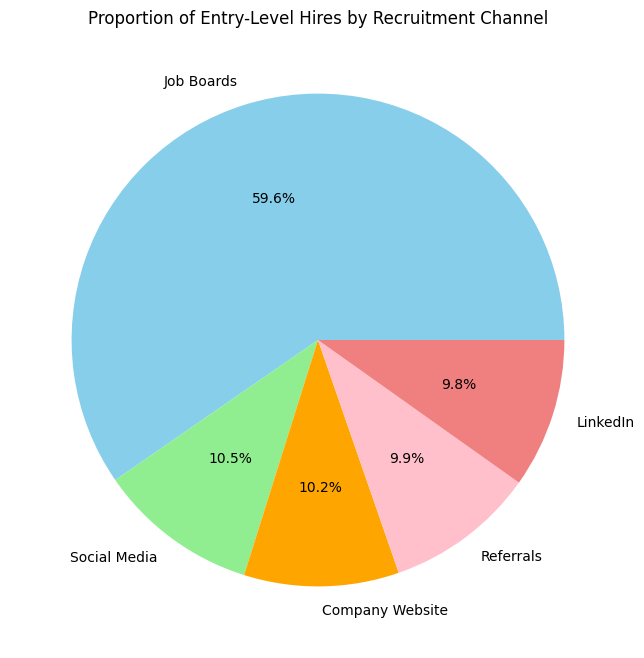

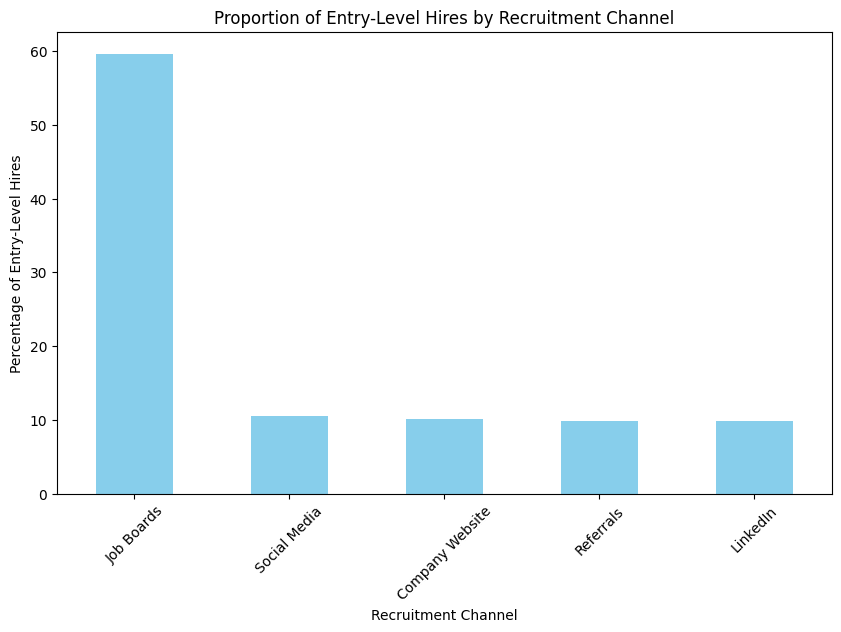

In [26]:
import matplotlib.pyplot as plt

# Filter data for mid-level employees
mid_level_data = df[df["job_level"] == "Entry"]

# Calculate the count of mid-level hires per recruitment channel
mid_channel_count = mid_level_data["recruitment_channel"].value_counts()

# Calculate percentages
mid_channel_percentage = mid_channel_count / mid_channel_count.sum() * 100

# Visualization: Pie Chart
plt.figure(figsize=(8, 8))
mid_channel_percentage.plot(
    kind="pie",
    autopct="%.1f%%",
    colors=["skyblue", "lightgreen", "orange", "pink", "lightcoral", "purple"],
    title="Proportion of Entry-Level Hires by Recruitment Channel"
)
plt.ylabel("")  # Remove the default y-axis label
plt.show()

# Visualization: Bar Chart
plt.figure(figsize=(10, 6))
mid_channel_percentage.plot(
    kind="bar",
    color="skyblue",
    title="Proportion of Entry-Level Hires by Recruitment Channel"
)
plt.xlabel("Recruitment Channel")
plt.ylabel("Percentage of Entry-Level Hires")
plt.xticks(rotation=45)
plt.show()


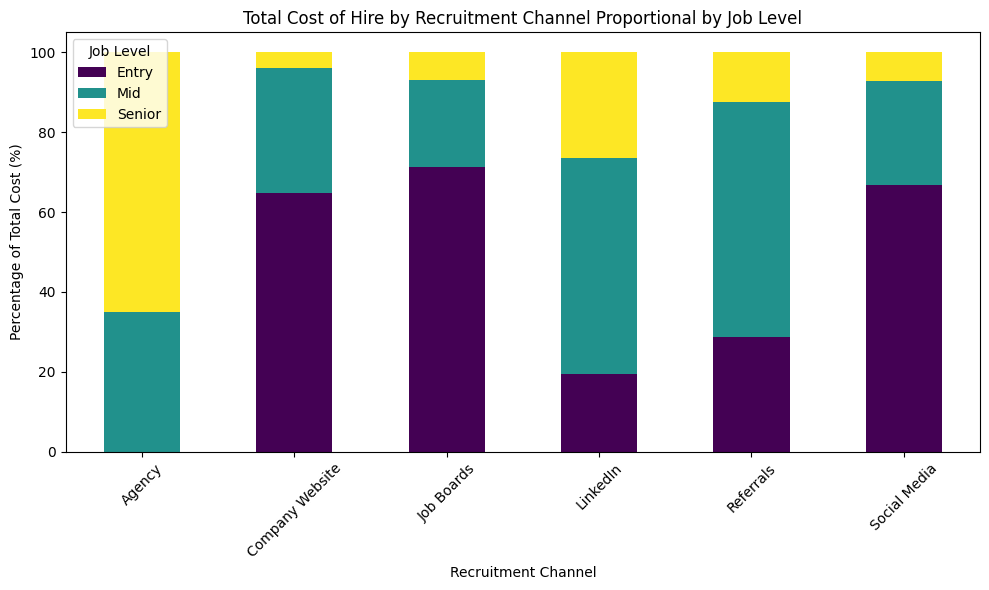

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by recruitment channel and job level, and sum the cost_per_hire
grouped_data = df.groupby(["recruitment_channel", "job_level"])["cost_per_hire"].sum().unstack(fill_value=0)

# Calculate proportions for 100% stacking
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot 100% stacked bar chart
grouped_data_percentage.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="viridis",
    title="Total Cost of Hire by Recruitment Channel Proportional by Job Level"
)

# Add labels and formatting
plt.xlabel("Recruitment Channel")
plt.ylabel("Percentage of Total Cost (%)")
plt.xticks(rotation=45)
plt.legend(title="Job Level")
plt.tight_layout()
plt.show()


<Figure size 3000x1200 with 0 Axes>

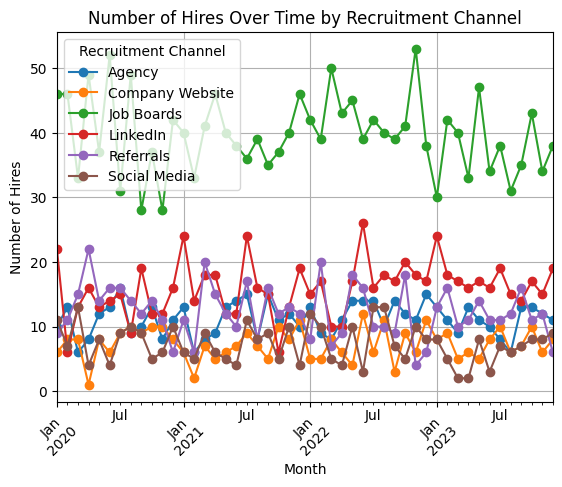

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert application_date and hire_date to datetime if not already
df['application_date'] = pd.to_datetime(df['application_date'])
df['hire_date'] = pd.to_datetime(df['hire_date'])

# Group by month and channel
df['application_month'] = df['application_date'].dt.to_period('M')
df_hires_per_month = df.groupby(['application_month', 'recruitment_channel']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(30, 12))
df_hires_per_month.plot(kind='line', marker='o', title='Number of Hires Over Time by Recruitment Channel')
plt.ylabel('Number of Hires')
plt.xlabel('Month')
plt.legend(title='Recruitment Channel')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


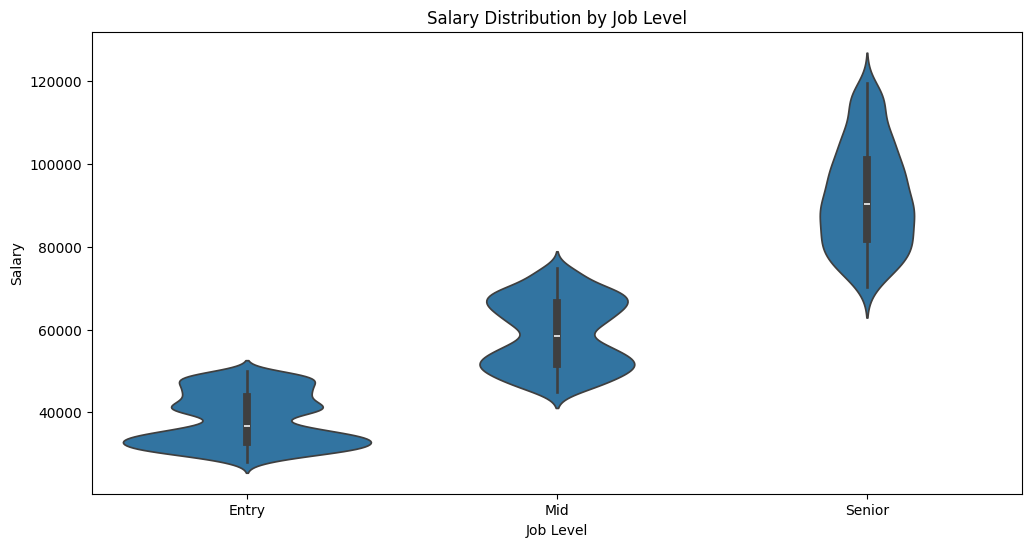

In [29]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='job_level', y='salary', data=df)
plt.title('Salary Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.show()


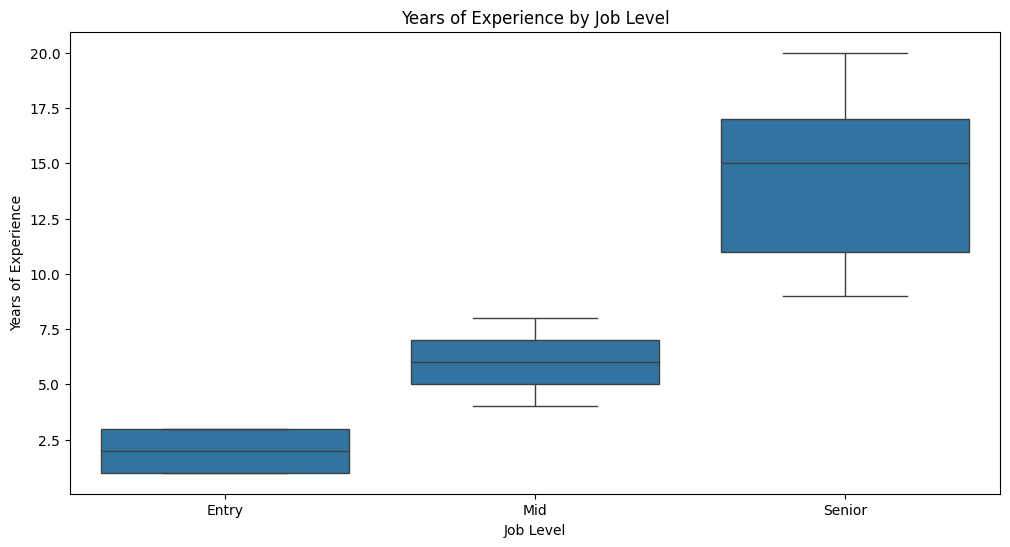

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_level', y='years_of_experience', data=df)
plt.title('Years of Experience by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Years of Experience')
plt.show()


<Figure size 1200x600 with 0 Axes>

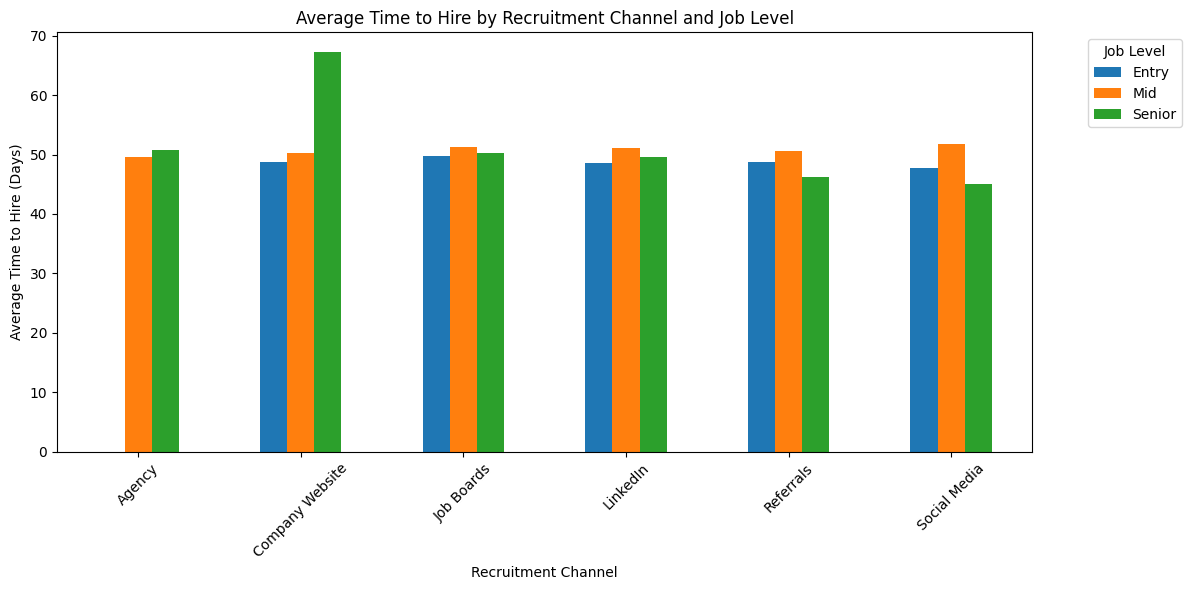

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by recruitment channel and job level, then calculate the average time to hire
avg_time_to_hire = df.groupby(['recruitment_channel', 'job_level'])['time_to_hire_days'].mean().unstack()

# Plot using a bar chart
plt.figure(figsize=(12, 6))
avg_time_to_hire.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Average Time to Hire by Recruitment Channel and Job Level')
plt.xlabel('Recruitment Channel')
plt.ylabel('Average Time to Hire (Days)')
plt.xticks(rotation=45)
plt.legend(title='Job Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [32]:
!pip install WordCloud

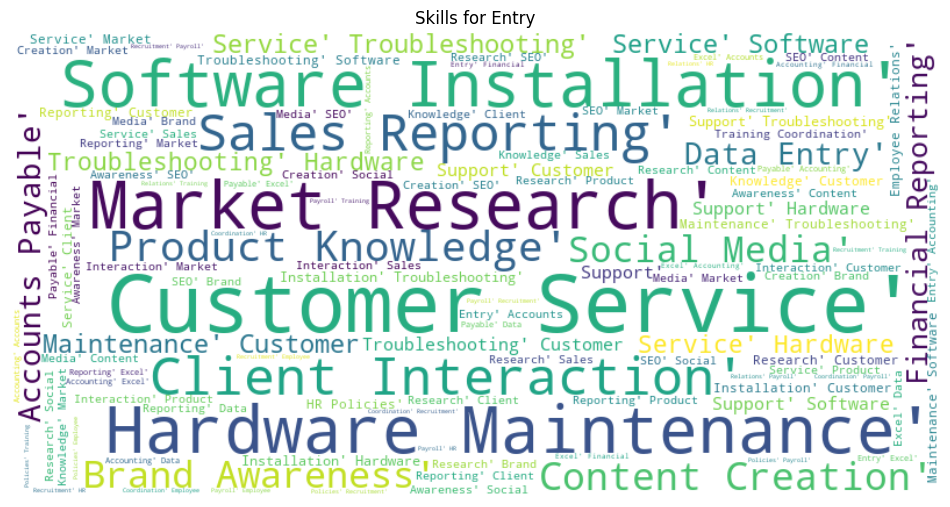

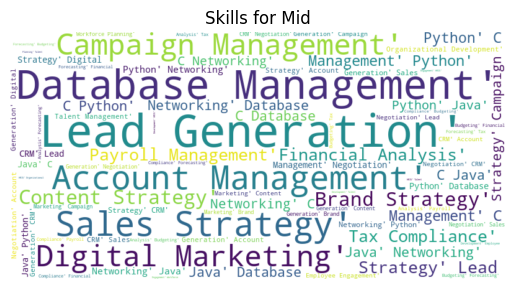

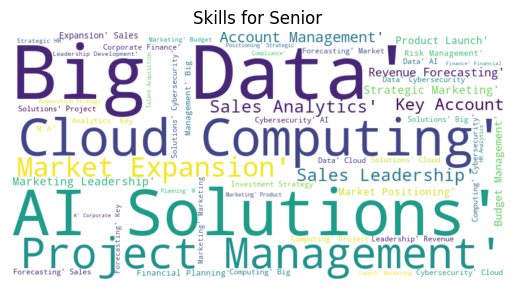

In [33]:
from wordcloud import WordCloud

# Assuming 'skills' is a text column
plt.figure(figsize=(12, 8))
for level in df['job_level'].unique():
    skills_data = ' '.join(df[df['job_level'] == level]['skills'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(skills_data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Skills for {level}")
    plt.axis('off')
    plt.show()


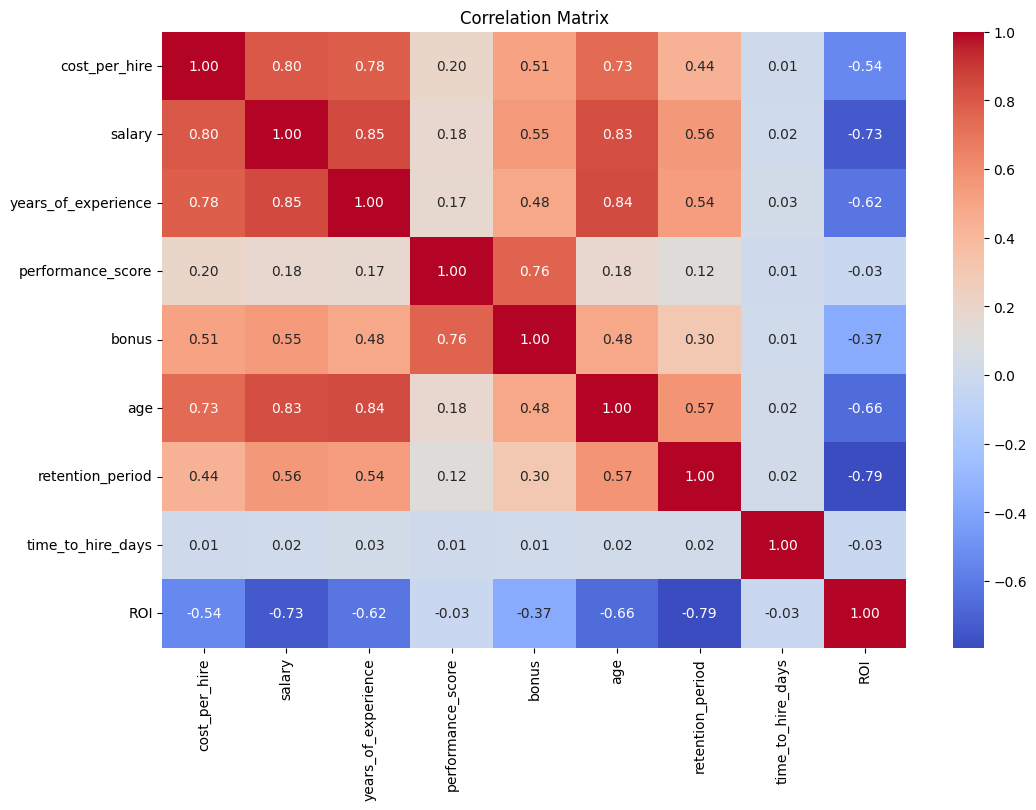

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset (replace with your actual dataset)
# df = your_dataframe

# Encode the recruitment_channel column
df_encoded = pd.get_dummies(df, columns=["recruitment_channel"], drop_first=True)

# Select only numeric columns for correlation
numeric_columns = df_encoded.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


  recruitment_channel  number_of_hired  number_of_applications  \
0              Agency              538             1537.142857   
1     Company Website              350             2333.333333   
2          Job Boards             1905            47625.000000   
3            LinkedIn              766             3830.000000   
4           Referrals              590             1475.000000   

   conversion_rate  
0               35  
1               15  
2                4  
3               20  
4               40  


C:\Users\user\AppData\Local\Temp\ipykernel_14092\229131515.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recruitment_channel', y='conversion_rate', data=data, palette='viridis')


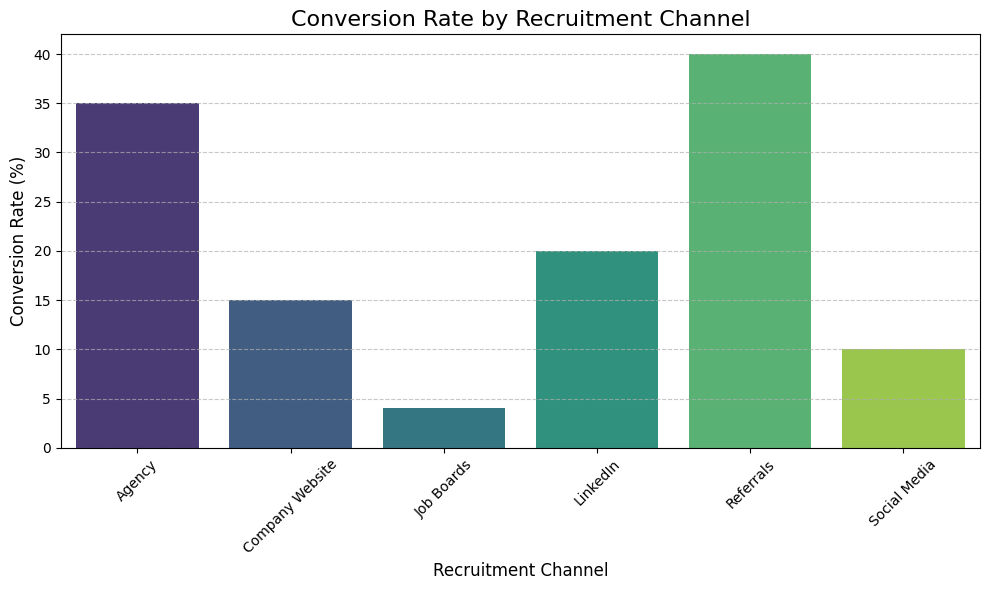

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the newly created Excel file
file_path = 'conversion_rate_by_channel_new.xlsx'  # Update this with your actual file path
data = pd.read_excel(file_path)

# Display the first few rows of the dataset for verification
print(data.head())

# Compare the conversion rates between recruitment channels
plt.figure(figsize=(10, 6))
sns.barplot(x='recruitment_channel', y='conversion_rate', data=data, palette='viridis')

# Add labels and title
plt.title('Conversion Rate by Recruitment Channel', fontsize=16)
plt.xlabel('Recruitment Channel', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


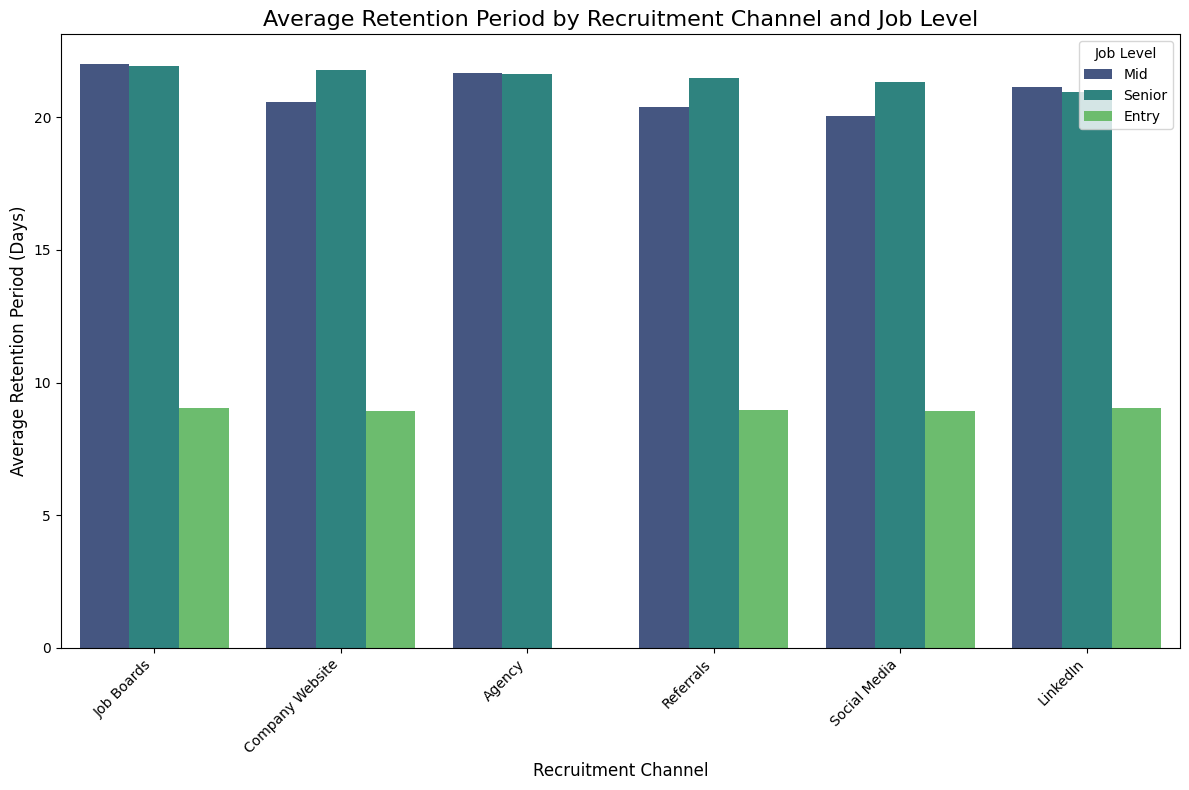

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset (replace with your actual dataset)
# df = your_dataframe

# Group the data by recruitment_channel and job_level, and calculate the average retention period
average_retention = (
    df.groupby(["recruitment_channel", "job_level"])["retention_period"]
    .mean()
    .reset_index()
    .sort_values(by="retention_period", ascending=False)
)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=average_retention,
    x="recruitment_channel",
    y="retention_period",
    hue="job_level",
    palette="viridis"
)

# Add titles and labels
plt.title("Average Retention Period by Recruitment Channel and Job Level", fontsize=16)
plt.xlabel("Recruitment Channel", fontsize=12)
plt.ylabel("Average Retention Period (Days)", fontsize=12)
plt.legend(title="Job Level", fontsize=10, loc="upper right")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


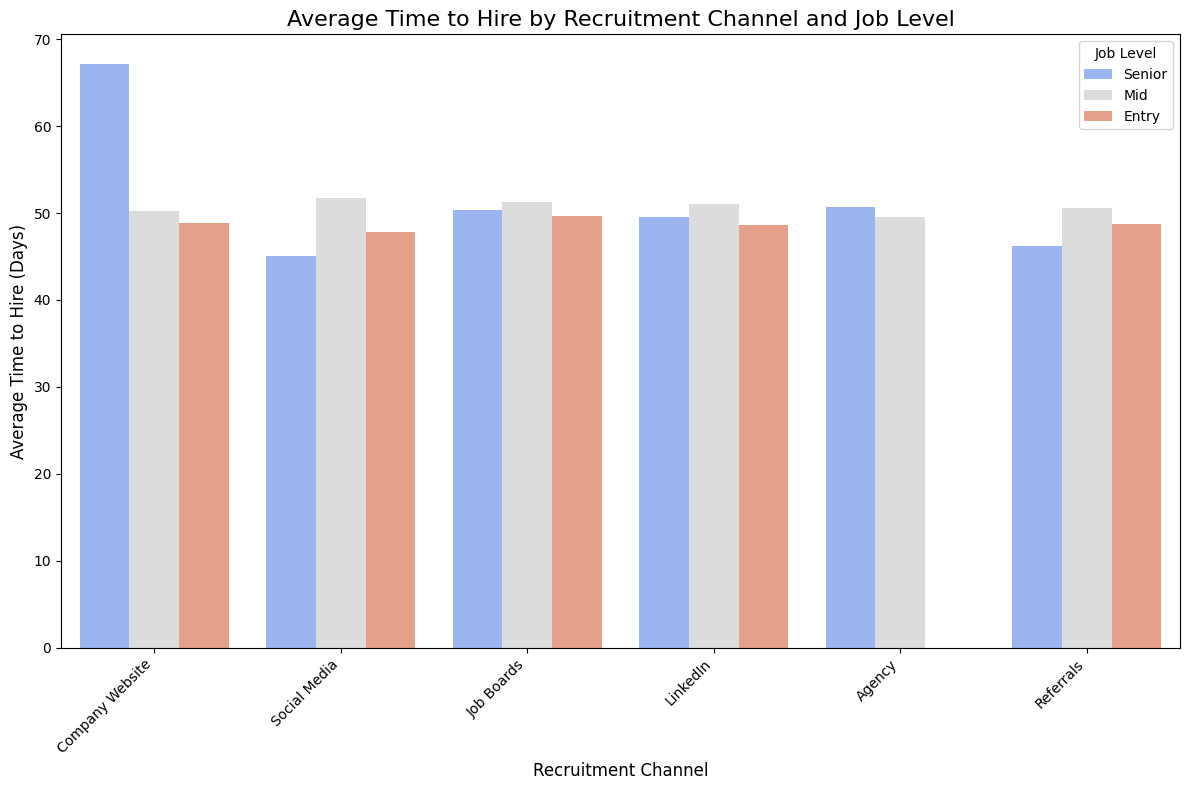

In [37]:
# Group the data by recruitment_channel and job_level, and calculate the average time_to_hire
average_time_to_hire = (
    df.groupby(["recruitment_channel", "job_level"])["time_to_hire_days"]
    .mean()
    .reset_index()
    .sort_values(by="time_to_hire_days", ascending=False)
)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=average_time_to_hire,
    x="recruitment_channel",
    y="time_to_hire_days",
    hue="job_level",
    palette="coolwarm"
)

# Add titles and labels
plt.title("Average Time to Hire by Recruitment Channel and Job Level", fontsize=16)
plt.xlabel("Recruitment Channel", fontsize=12)
plt.ylabel("Average Time to Hire (Days)", fontsize=12)
plt.legend(title="Job Level", fontsize=10, loc="upper right")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


Average ROI by channel is calculated and saved!


C:\Users\user\AppData\Local\Temp\ipykernel_14092\3261750500.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recruitment_channel', y='ROI', data=average_roi_by_channel, palette='viridis')


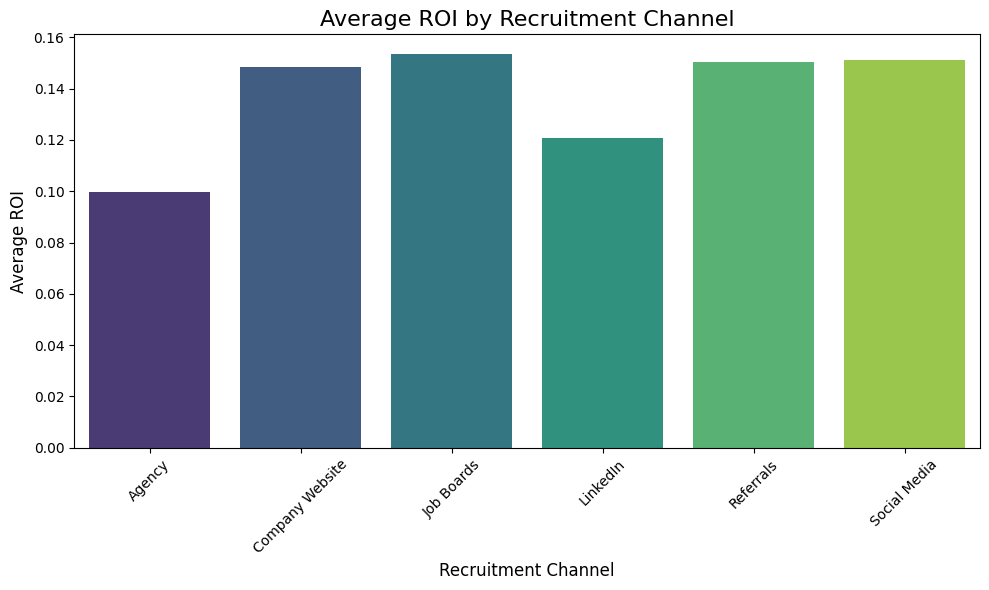

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correcting the ROI calculation
df['ROI'] = (
    (df['performance_score'] * (df['retention_period'] / 12) * 1000 ) / (df['cost_per_hire']
    + (df['salary'] * df['retention_period'])
    + (df['bonus'] * (df['retention_period'] / 12)))
)

# Calculate average ROI by recruitment channel
average_roi_by_channel = df.groupby('recruitment_channel')['ROI'].mean().reset_index()

# Save the results to a new Excel file
file_path = 'average_roi_by_channel.xlsx'  # Modify the path if needed
average_roi_by_channel.to_excel(file_path, index=False)

print("Average ROI by channel is calculated and saved!")

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='recruitment_channel', y='ROI', data=average_roi_by_channel, palette='viridis')
plt.title('Average ROI by Recruitment Channel', fontsize=16)
plt.xlabel('Recruitment Channel', fontsize=12)
plt.ylabel('Average ROI', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



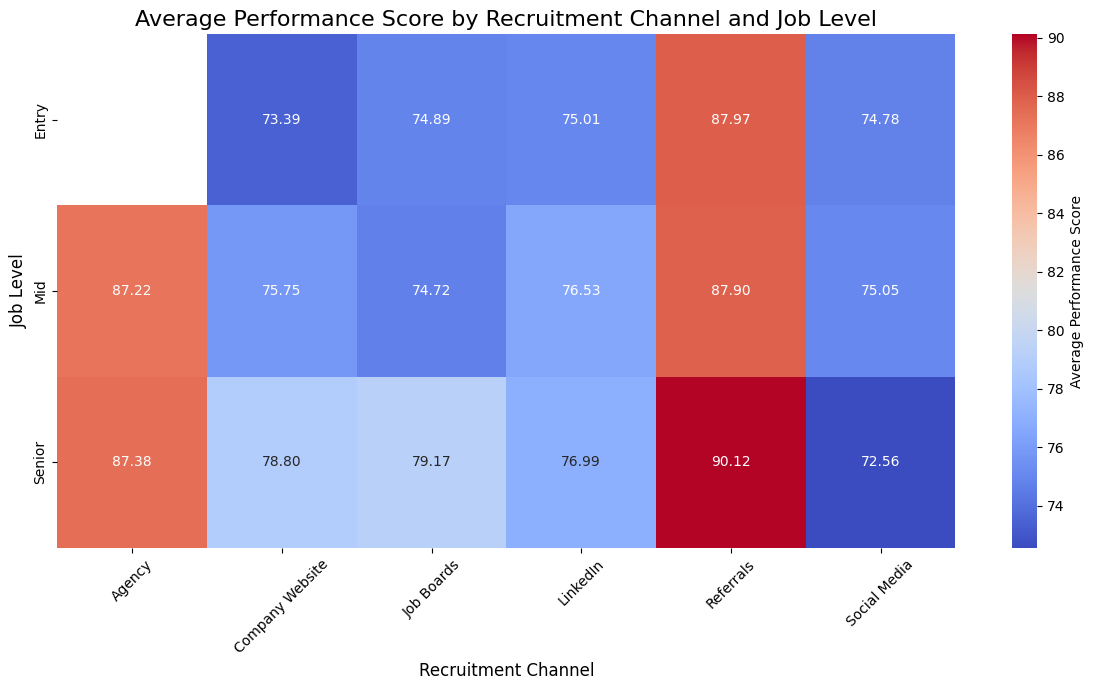

In [532]:
# Calculate average performance score by recruitment channel and job level
average_performance_score_by_channel_level = df.groupby(['recruitment_channel', 'job_level'])['performance_score'].mean().unstack().reset_index()

# Plot the results as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.heatmap(average_performance_score_by_channel_level.set_index('recruitment_channel').T, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Average Performance Score'})
plt.title('Average Performance Score by Recruitment Channel and Job Level', fontsize=16)
plt.xlabel('Recruitment Channel', fontsize=12)
plt.ylabel('Job Level', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


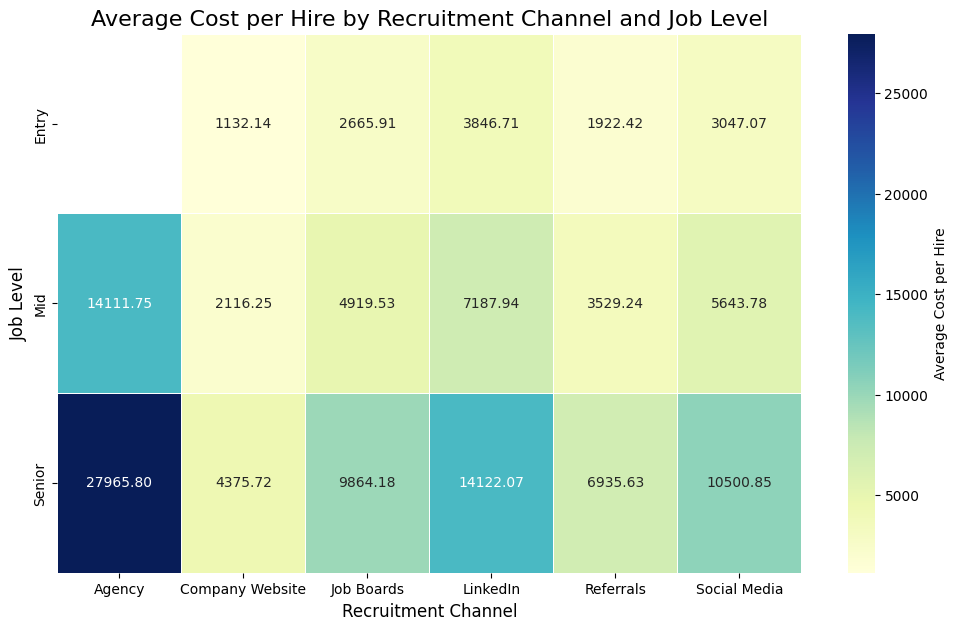

In [533]:
# Pivoting the data to create a matrix for heatmap visualization
pivot_data = avg_cost_per_hire.pivot(index='job_level', columns='recruitment_channel', values='cost_per_hire')

# Setting up the plot size
plt.figure(figsize=(12, 7))

# Plotting the heatmap
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Cost per Hire'}, linewidths=0.5)

# Adding title and labels
plt.title('Average Cost per Hire by Recruitment Channel and Job Level', fontsize=16)
plt.xlabel('Recruitment Channel', fontsize=12)
plt.ylabel('Job Level', fontsize=12)

# Show the plot
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_13544\2472414984.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recruitment_channel', y='cost_per_hire', data=avg_cost_per_hire_channel, palette='Blues')


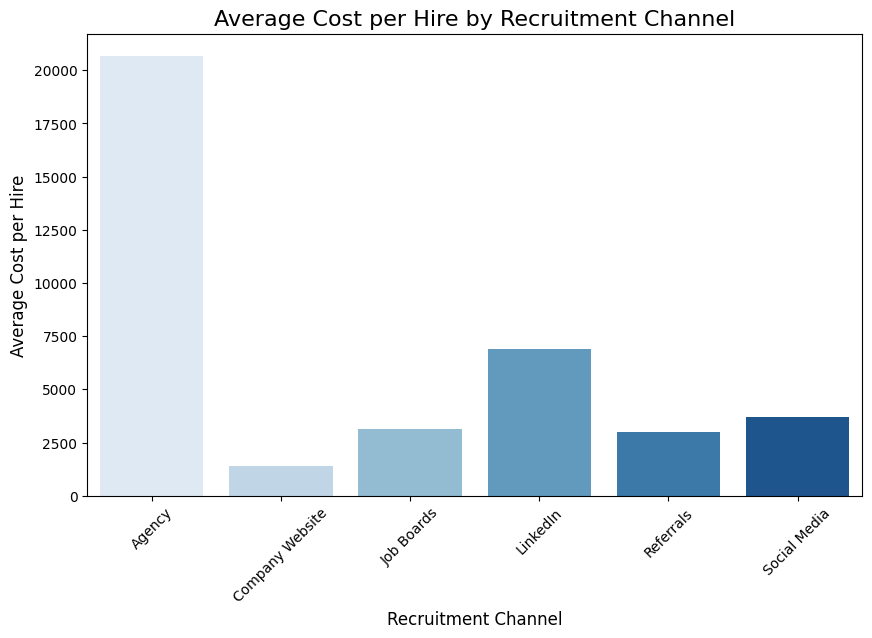

In [534]:
# Grouping by 'recruitment_channel' and calculating the average 'cost_per_hire'
avg_cost_per_hire_channel = df.groupby('recruitment_channel')['cost_per_hire'].mean().reset_index()

# Setting up the plot size
plt.figure(figsize=(10, 6))

# Plotting the bar chart
sns.barplot(x='recruitment_channel', y='cost_per_hire', data=avg_cost_per_hire_channel, palette='Blues')

# Adding title and labels
plt.title('Average Cost per Hire by Recruitment Channel', fontsize=16)
plt.xlabel('Recruitment Channel', fontsize=12)
plt.ylabel('Average Cost per Hire', fontsize=12)

# Rotating x-axis labels for better visibility (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.show()
